# Volkswagen Polo Sales analysis

## Data import

In [194]:
# import all csv files from /csv folder
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# current path: C:\Users\javio\Escritorio\apps\cochesNet-sell
# csv files path: C:\Users\javio\Mi unidad\csv

# Import all csv files from /csv folder, need to change the path to the folder where the csv files are stored
os.chdir("C:/Users/javio/Mi unidad/csv")
all_files = [i for i in glob.glob('*.csv')]
li = []

# create a list with all the datadatas
for filename in all_files:
    df = pd.read_csv(filename, sep = ';')
    li.append(df)

# concatenate all the Dataframes
data = pd.concat(li, axis=0, ignore_index=True)
data['id'] = data['id'].astype(int)

## General car prices

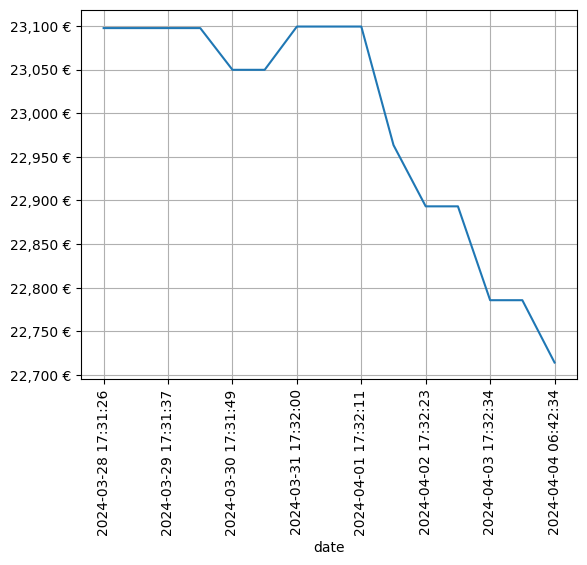

In [195]:
# average price of the cars group by date. plot the result and x axis 90 degrees. x axis only shows the date, not the time
data.groupby('date')['price'].mean().plot()
plt.xticks(rotation=90)
plt.grid()
# units in euros
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} €'))
plt.show()

### Cars that have reduced the cost

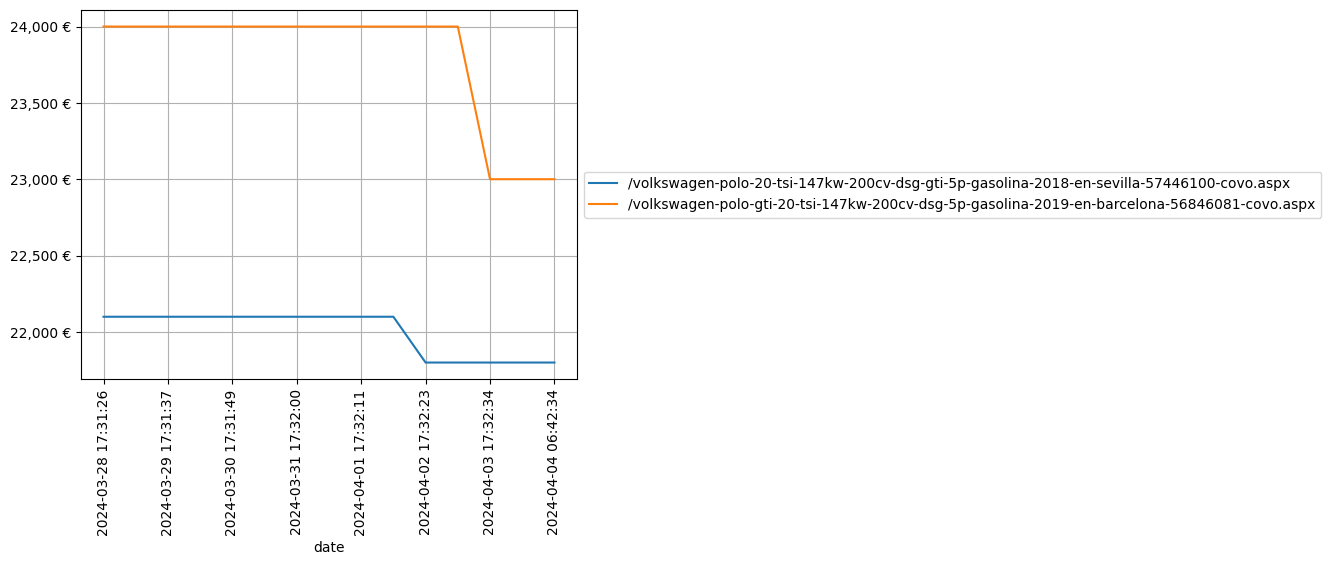

     price     km  year
981  21799  72499  2018
https://www.coches.net/segunda-mano/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p-gasolina-2018-en-sevilla-57446100-covo.aspx

     price     km  year
997  23000  83000  2019
https://www.coches.net/segunda-mano/volkswagen-polo-gti-20-tsi-147kw-200cv-dsg-5p-gasolina-2019-en-barcelona-56846081-covo.aspx



In [206]:
# group ads by url and count the unique prices. store urls in a list
url_count = data.groupby('url')['price'].nunique()
url_count = url_count[url_count > 1]
url_list = url_count.index.tolist()

# plot the price of the cars with the same url over time
for url in url_list:
    data[data['url'] == url].groupby('date')['price'].mean().plot()
plt.xticks(rotation=90)
plt.grid()
plt.legend(url_list, loc='center left', bbox_to_anchor=(1, 0.5))
# units in euros
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} €'))
plt.show()

# Also print the detail of each car: price, km, urls of the cars with the same url over time, preceded by https://www.coches.net/segunda-mano (print last known price and km)
for url in url_list:
    print(data[data['url'] == url][['price', 'km', 'year']].tail(1))
    print('https://www.coches.net/segunda-mano' + url)
    print('')

## All cars price analysis

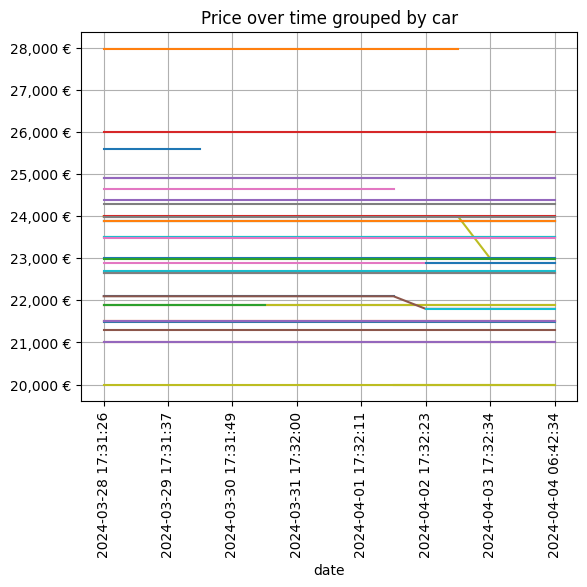

In [197]:

# plot the price of all the cars over time with a line plot. x axis 90 degrees. each line represents a car
data.groupby(['id', 'date'])['price'].mean().unstack(0).plot()
plt.title('Price over time grouped by car')
plt.xticks(rotation=90)
plt.grid()
# hide the legend
plt.legend().set_visible(False)
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# units in euros
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} €'))
plt.show()

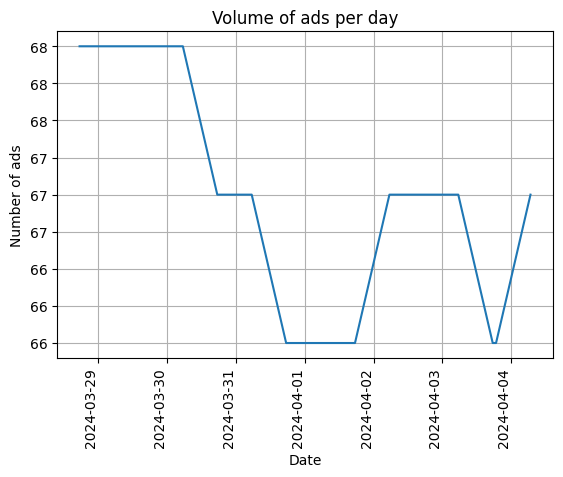

In [198]:
# number of ads per day
plt.title('Volume of ads per day')
# copy df and convert date to datetime
data2 = data.copy()
data2['date'] = pd.to_datetime(data2['date'])
# group by date and count the number of ads
data2.groupby('date')['id'].count().plot()
plt.xticks(rotation=90)
# Y labels no decimals just int
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
plt.ylabel('Number of ads')
# x label only date without time
plt.xlabel('Date')
plt.grid()
plt.show()

## Sales analysis. Sold cars

In [199]:
# create sales Dataframe
sales = pd.DataFrame()

# current date is the last date of the ads
current_date = data['date'].max()

# get the first and last date of the ad for each car id
first_date = data.groupby('url')['date'].min()
last_date = data.groupby('url')['date'].max()

# add first and last date to the sales Dataframe as datetime objects
sales['first_date'] = pd.to_datetime(first_date)
sales['last_date'] = pd.to_datetime(last_date)
sales = sales.reset_index()

#sales[sold] True is the car is sold, False if the car is still for sale.
# if the last date of the ad is the current date, the car is still for sale
sales['sold'] = sales['last_date'] != current_date

# calculate the difference between the first and last date of the ad for each car id
sales['days-to-sale'] = sales['last_date'] - sales['first_date']
sales['days-to-sale'] = sales['days-to-sale'].dt.days

sales

,url,first_date,last_date,sold,days-to-sale
0,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 17:31:26,2024-04-02 05:32:17,True,4
1,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
2,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-04-02 17:32:23,2024-04-04 06:42:34,False,1
3,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
4,/volkswagen-polo-20-tsi-147kw-200cv-dsg-gti-5p...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
5,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
6,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
7,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
8,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-28 17:31:26,2024-04-04 06:42:34,False,6
9,/volkswagen-polo-gti-2.0-tsi-147kw-200cv-dsg-5...,2024-03-30 17:31:49,2024-04-02 17:32:23,True,3


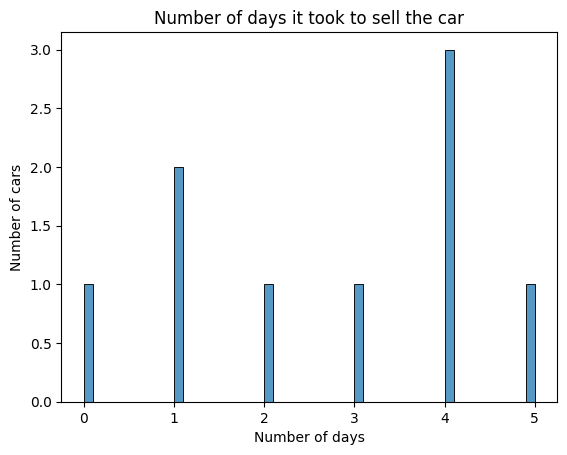

In [200]:
# plot the number of days it took to sell the car. only cars that are sold
sns.histplot(sales[sales['sold'] == True]['days-to-sale'], bins=50)
plt.xlabel('Number of days')
plt.title('Number of days it took to sell the car')
plt.ylabel('Number of cars')
plt.show()

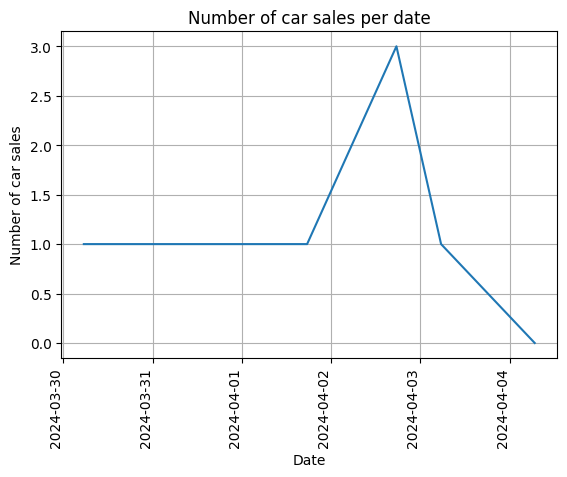

In [201]:
# number of car sales per date
sales['last_date'] = pd.to_datetime(sales['last_date'])
sales['first_date'] = pd.to_datetime(sales['first_date'])
# sum of the number of car sales per date
sales.groupby('last_date')['sold'].sum().plot()
plt.title('Number of car sales per date')
plt.grid()
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of car sales')
plt.show()

In [202]:
# average price of the cars that are sold
sales = sales.merge(data, left_on='url', right_on='url')

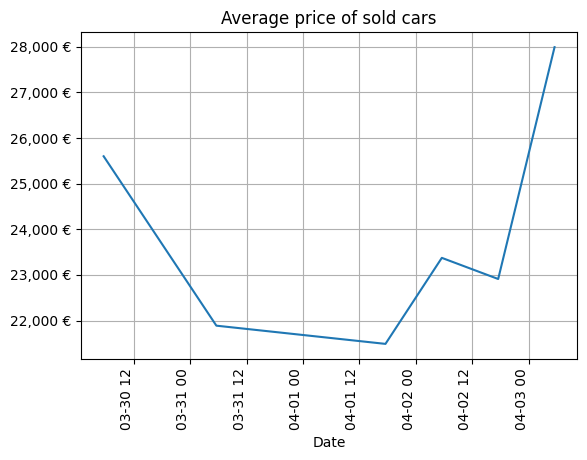

In [203]:
# average price of the cars that are sold per date
# plot has grid and x axis 90 degrees
sales[sales['sold'] == True].groupby('last_date')['price'].mean().plot()
plt.title('Average price of sold cars')
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Date')
# units in euros
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} €'))
plt.show()

## Non-sold cars. Current market

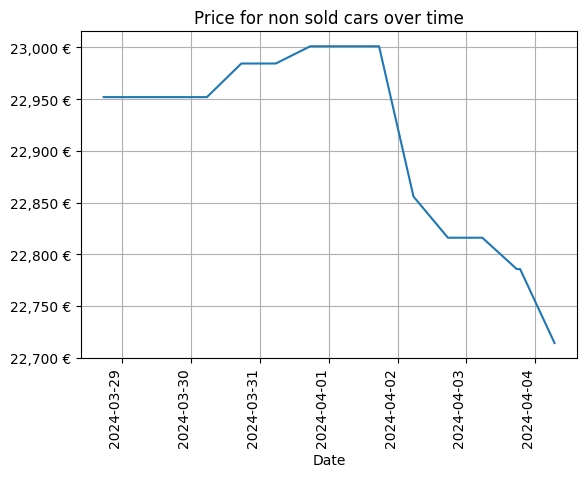

In [204]:
# price for non sold cars over time
# plot has grid and x axis 90 degrees
data2[data2['id'].isin(sales[sales['sold'] == False]['id'])].groupby('date')['price'].mean().plot()
plt.title('Price for non sold cars over time')
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Date')
# units in euros
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} €'))
plt.show()

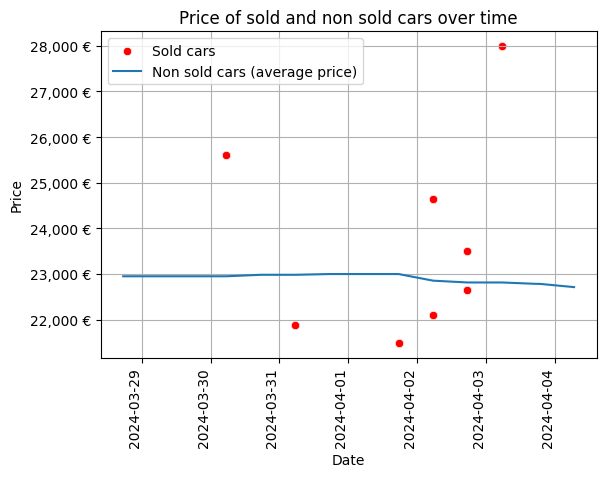

In [205]:
# double plot with the average price of the cars that are sold and the price of the cars that are not sold
# plot has grid and x axis 90 degrees
# for sold cars do a scatter plot with each car price
sns.scatterplot(data=sales[sales['sold'] == True], x='last_date', y='price', color='red')

#sales[sales['sold'] == True].groupby('last_date')['price'].mean().plot()
data2[data2['id'].isin(sales[sales['sold'] == False]['id'])].groupby('date')['price'].mean().plot()
plt.title('Price of sold and non sold cars over time')
plt.xticks(rotation=90)
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
# units in euros
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f} €'))
plt.legend(['Sold cars', 'Non sold cars (average price)'])
plt.show()
